In [1]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
df = pd.read_csv('../dataset/face/fer2013.csv')
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [4]:
train = df[df.Usage == 'Training']
test = df[df.Usage == 'PrivateTest']
val = df[df.Usage == 'PublicTest']

In [5]:
print('train: {}'.format(len(train)))
print('test: {}'.format(len(test)))
print('validation: {}'.format(len(val)))

train: 28709
test: 3589
validation: 3589


In [6]:
train

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


# Build X sets

In [11]:
def build_X(data):
    res = np.zeros((len(data), 48, 48, 1)).astype('float32')

    for i in range(len(data)):
        pixl = data.iloc[i,:].pixels.split(' ')
        pixels = np.array(pixl).astype('float32') / 255.
        pixels = pixels.reshape(48, 48, 1)
        res[i] = pixels
    
    return res

In [12]:
X_train = build_X(train)
X_test = build_X(test)
X_val = build_X(val)

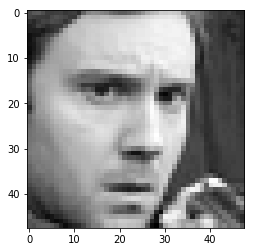

In [13]:
plt.imshow(X_train[0].reshape((48, 48)), cmap='gray')
plt.show()

# Build Y sets
(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [14]:
# One Hot Encoding 7 categories
Y_train = np_utils.to_categorical(train.emotion.values, 7)
Y_test = np_utils.to_categorical(test.emotion.values, 7)
Y_val = np_utils.to_categorical(val.emotion.values, 7)

In [20]:
Y_train[:3]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]])

# M1

In [130]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# M1_Training

In [131]:
%%time
hist = model.fit(X_train, Y_train, epochs=40, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 28709 samples, validate on 3589 samples
Epoch 1/40
61s - loss: 2.8632 - acc: 0.2446 - val_loss: 2.4441 - val_acc: 0.2449
Epoch 2/40
60s - loss: 2.1294 - acc: 0.2774 - val_loss: 2.3716 - val_acc: 0.1836
Epoch 3/40
60s - loss: 1.7662 - acc: 0.3735 - val_loss: 1.8586 - val_acc: 0.3059
Epoch 4/40
60s - loss: 1.5747 - acc: 0.4338 - val_loss: 1.5322 - val_acc: 0.4575
Epoch 5/40
60s - loss: 1.4761 - acc: 0.4742 - val_loss: 1.5101 - val_acc: 0.4753
Epoch 6/40
60s - loss: 1.4090 - acc: 0.5018 - val_loss: 1.3886 - val_acc: 0.5138
Epoch 7/40
60s - loss: 1.3700 - acc: 0.5206 - val_loss: 1.4147 - val_acc: 0.5065
Epoch 8/40
60s - loss: 1.3399 - acc: 0.5396 - val_loss: 1.4848 - val_acc: 0.4684
Epoch 9/40
60s - loss: 1.3100 - acc: 0.5579 - val_loss: 1.5549 - val_acc: 0.4436
Epoch 10/40
60s - loss: 1.2878 - acc: 0.5678 - val_loss: 1.3540 - val_acc: 0.5341
Epoch 11/40
60s - loss: 1.2712 - acc: 0.5809 - val_loss: 1.3291 - val_acc: 0.5698
Epoch 12/40
60s - loss: 1.2540 - acc: 0.5916 - val_loss: 1

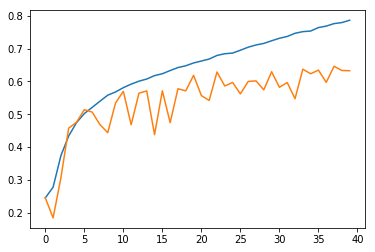

In [132]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.show()

In [133]:
model.save("face_M01.hdf5")

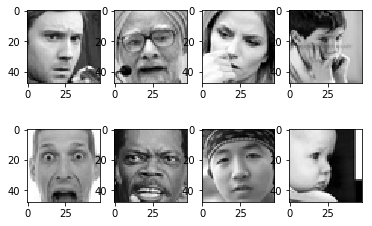

In [18]:
plt.subplot(241)
plt.imshow(X_train[0].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(242)
plt.imshow(X_train[1].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(243)
plt.imshow(X_train[2].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(244)
plt.imshow(X_train[3].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(245)
plt.imshow(X_train[9].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(246)
plt.imshow(X_train[10].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(247)
plt.imshow(X_train[11].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(248)
plt.imshow(X_train[12].reshape((48, 48)), cmap='gray')
plt.grid(False)

plt.show()

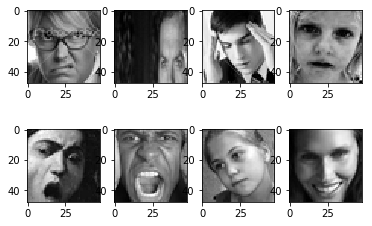

In [30]:
plt.subplot(241)
plt.imshow(X_test[0].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(242)
plt.imshow(X_test[1].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(243)
plt.imshow(X_test[2].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(244)
plt.imshow(X_test[3].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(245)
plt.imshow(X_test[4].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(246)
plt.imshow(X_test[5].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(247)
plt.imshow(X_test[6].reshape((48, 48)), cmap='gray')
plt.grid(False)
plt.subplot(248)
plt.imshow(X_test[7].reshape((48, 48)), cmap='gray')
plt.grid(False)

plt.show()

* Implication
> Train and test dataset have the variations of angle and part of faces repectively

* Idea
> Try to augment train dataset to cover the variations of samples

# M2

In [33]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# M2_Training

In [34]:
# data augmentation
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.1, rotation_range=20, fill_mode='nearest')
datagen.fit(X_train)

In [37]:
%%time
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=100),
                    steps_per_epoch=len(X_train) / 100, epochs=50, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/50
59s - loss: 1.8310 - acc: 0.2535 - val_loss: 1.8128 - val_acc: 0.2527
Epoch 2/50
59s - loss: 1.8037 - acc: 0.2621 - val_loss: 1.7697 - val_acc: 0.2694
Epoch 3/50
59s - loss: 1.7812 - acc: 0.2713 - val_loss: 1.7808 - val_acc: 0.2561
Epoch 4/50
59s - loss: 1.7621 - acc: 0.2865 - val_loss: 1.7240 - val_acc: 0.3165
Epoch 5/50
59s - loss: 1.7461 - acc: 0.2983 - val_loss: 1.6902 - val_acc: 0.3396
Epoch 6/50
59s - loss: 1.7274 - acc: 0.3183 - val_loss: 1.6410 - val_acc: 0.3661
Epoch 7/50
59s - loss: 1.6896 - acc: 0.3488 - val_loss: 1.5601 - val_acc: 0.4193
Epoch 8/50
59s - loss: 1.6510 - acc: 0.3716 - val_loss: 1.5015 - val_acc: 0.4514
Epoch 9/50
59s - loss: 1.6075 - acc: 0.3989 - val_loss: 1.5302 - val_acc: 0.4244
Epoch 10/50
59s - loss: 1.5653 - acc: 0.4250 - val_loss: 1.4166 - val_acc: 0.4845
Epoch 11/50
59s - loss: 1.5272 - acc: 0.4409 - val_loss: 1.3784 - val_acc: 0.4999
Epoch 12/50
59s - loss: 1.4921 - acc: 0.4563 - val_loss: 1.3609 - val_acc: 0.5063
Epoch 13/50
59s - loss: 1

In [73]:
model.save("face_M02.hdf5")

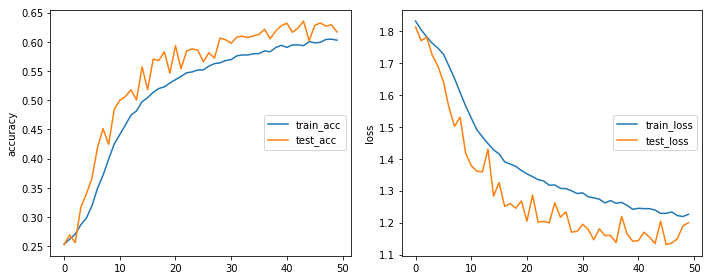

In [71]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist.history["acc"], label='train_acc')
ax1.plot(hist.history["val_acc"], label='test_acc')
ax1.set_ylabel('accuracy')
ax1.legend(loc='center right')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist.history["loss"], label='train_loss')
ax2.plot(hist.history["val_loss"], label='test_loss')
ax2.set_ylabel('loss')
ax2.legend(loc='center right')

fig.tight_layout()
plt.show()

* Result
> test accuracy were not improved at this try.  
> *** discovery: *** test accuracy getting above the train accuracy w/ data augmentation

* Idea
> It seems that augmentation parameters were not properly set  
> Inspect each datasets with eyes again and get implications again how to do the next try with train data augmentation technique